<!-- <center><h1>
 Experiment #6 
</h1>
<b>AIM:</b> Build an artificial neural network by implementing the Backpropagation algorithm and test the same appropriate data set -->

# Building a Neural Network from scratch and working on Breast Cancer Dataset

*** 
* IMPORTING THE NECESSARY LIBRARIES

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

We will be applying a neural network on breast cancer data set where value of :
* 0 => Malignant
* 1 => Benign

In [72]:
d = load_breast_cancer()
print(d['data'].shape)

(569, 30)


this is our row-wise data for breast cancer prediciton, we need to normalize our data for our NN to achieve the minima quickly at an high learning rate

In [73]:
d['data'].transpose()
# each row represents a column's data so we  can normalize a row here 

array([[1.799e+01, 2.057e+01, 1.969e+01, ..., 1.660e+01, 2.060e+01,
        7.760e+00],
       [1.038e+01, 1.777e+01, 2.125e+01, ..., 2.808e+01, 2.933e+01,
        2.454e+01],
       [1.228e+02, 1.329e+02, 1.300e+02, ..., 1.083e+02, 1.401e+02,
        4.792e+01],
       ...,
       [2.654e-01, 1.860e-01, 2.430e-01, ..., 1.418e-01, 2.650e-01,
        0.000e+00],
       [4.601e-01, 2.750e-01, 3.613e-01, ..., 2.218e-01, 4.087e-01,
        2.871e-01],
       [1.189e-01, 8.902e-02, 8.758e-02, ..., 7.820e-02, 1.240e-01,
        7.039e-02]])

In [78]:
# looking at the shape of our data 
d['data'].transpose().shape

(30, 569)

In [79]:
# NORMALIZING THE DATASET b/w 0 and 1: 
x = d['data'].transpose().copy()
for i in range(len(x)):
    x[i] = (x[i])/(np.max(x[i]) - np.min(x[i])) 
    
print(x)

# looking at the output values 
y = d['target'].copy()
y = y.reshape((1,len(y)))
print(y)

[[0.85143641 0.97354347 0.93189455 ... 0.78565005 0.97496332 0.36726774]
 [0.35103145 0.60094691 0.71863375 ... 0.94961109 0.99188367 0.82989516]
 [0.84859374 0.9183885  0.89834842 ... 0.74839334 0.96814318 0.33114505]
 ...
 [0.91202749 0.63917526 0.83505155 ... 0.48728522 0.91065292 0.        ]
 [0.90695841 0.54208555 0.71220185 ... 0.43721664 0.80563769 0.56593732]
 [0.77987669 0.58389086 0.57444576 ... 0.51292142 0.81332809 0.46169487]]
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1
  0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1
  0 1 1 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1
  1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1
  0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0
  1 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 

### Dividing the dataset for Hold-Out Cross Validation

In [80]:
# dividing the data set uniformly in 70-30 ratio 
(X_train, X_test, Y_train, Y_test) = train_test_split(x.T, y.T, train_size=0.7, random_state=1)

In [81]:
X_train.T.shape

(30, 398)

## Model Making 

In [82]:
# defining activation functions: 
def sigmoid(z):
    return 1/(1+np.exp(-z))
def ReLU(z):
    #zero = np.zeros(z.shape)
    #return np.max(zero,z) # returns element wise maximum
    z[z < 0] = 0
    return z
def ReLU_derivative(z):
    z[z > 0] = 1
    z[z <= 0] = 0
    return z

In [204]:
def layer_i(prev_activation,W ,b):
    z = np.dot(W,prev_activation) + b
    g = ReLU(z)
    data_node = {'w':W, 'b':b, 'z':z, 'a':g}
    return data_node

def LOSS(Y_true,Y_pred):
    return (-1/Y_true.shape[1]) * np.sum(Y_true*np.log(Y_pred) + (1-Y_true)*np.log(1-Y_pred))

def Backward_Prop(w_plus, dz_plus, z_curr, input_val, length):
    da = np.dot(w_plus.T,dz_plus)
    dz = np.multiply(da,ReLU_derivative(z_curr))
    dw = np.dot(dz, input_val.T)
    db = (1/length) * np.sum(dz,axis = 1, keepdims = True)
    return {'dz':dz,'dw':dw,'db':db}
    
def LOGISTIC_REGRESSION_NEURAL_NET(input_values, output_values, learn_rate, num_iterations):
    length = input_values.shape[1]
    np.random.seed(2)
    l1 = {'w':np.random.rand(8,input_values.shape[0]) * 0.01, 'b': np.zeros((8,1))}
    l2 = {'w':np.random.rand(4,8) * 0.01, 'b': np.zeros((4,1))}
    l3 = {'w':np.random.rand(2,4) * 0.01, 'b': np.zeros((2,1))}
    l4 = {'w':np.random.rand(1,2) * 0.01, 'b': np.zeros((1,1))}
    
    cost_values = []
    
    print('layer1:','weights dimensions',l1['w'].shape)
    print('layer2:','weights dimensions',l2['w'].shape,l2['b'].shape)
    print('layer3:','weights dimensions',l3['w'].shape,l3['b'].shape)
    print('layer4:','weights dimensions',l4['w'].shape,l4['b'].shape)
    #print(cost)
    
    for i in range(1,num_iterations+1):
        l1 = layer_i(input_values,l1['w'],l1['b'])
        l2 = layer_i(l1['a'],l2['w'],l2['b'])
        l3 = layer_i(l2['a'],l3['w'],l3['b'])
        l4 = layer_i(l3['a'],l4['w'],l4['b'])
        # l4 is the output so we need to change it's activation values
        l4['a'] = sigmoid(l4['z'])
        cost = LOSS(output_values,l4['a'])
        cost_values.append(cost)
        
        # defining backprop for the last layer manually since the activation function is different 
        dz = l4['a'] - output_values
        dw = np.dot(dz,l3['a'].T)
        db = (1/length) * np.sum(dz,axis = 1,keepdims = True)
        
        # Now backpropagating in other layers:
        dl3 = Backward_Prop(l4['w'],dz,l3['z'],l2['a'],length)
        dl2 = Backward_Prop(l3['w'],dl3['dz'],l2['z'],l1['a'],length)
        dl1 = Backward_Prop(l2['w'],dl2['dz'],l1['z'],input_values,length)
        
        # updating the values:
        l4['w'] = l4['w'] - learn_rate*dw
        l4['b'] = l4['b'] - learn_rate*db
        l3['w'] = l3['w'] - learn_rate*dl3['dw']
        l3['b'] = l3['b'] - learn_rate*dl3['db']
        l2['w'] = l2['w'] - learn_rate*dl2['dw']
        l2['b'] = l2['b'] - learn_rate*dl2['db']
        l1['w'] = l1['w'] - learn_rate*dl1['dw']
        l1['b'] = l1['b'] - learn_rate*dl1['db']
        
        if i % 100 == 0:
            print('COST AFTER',i,'ITERATIONS ====>',cost)
    return {'l1':l1,'l2':l2,'l3':l3,'l4':l4}, cost_values

#### Running the MODEL for learning on Training set

In [206]:
layers, cost = LOGISTIC_REGRESSION_NEURAL_NET(X_train.T,Y_train.T,0.001,600)

layer1: weights dimensions (8, 30)
layer2: weights dimensions (4, 8) (4, 1)
layer3: weights dimensions (2, 4) (2, 1)
layer4: weights dimensions (1, 2) (1, 1)
COST AFTER 100 ITERATIONS ====> 0.6807235124690812
COST AFTER 200 ITERATIONS ====> 0.6729272323963584
COST AFTER 300 ITERATIONS ====> 0.6663040507288249
COST AFTER 400 ITERATIONS ====> 0.33673326887368554
COST AFTER 500 ITERATIONS ====> 0.30814776740201616
COST AFTER 600 ITERATIONS ====> 0.2870794896605691


<b> looking at the learning of model through loss :

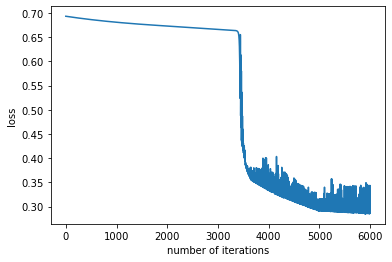

In [219]:
a = range(len(cost))
plt.xlabel('number of iterations')
plt.ylabel('loss')
plt.plot(a,cost)

In [231]:
# defining function for performance measures:
def confusion_mat(predicted,Y_test):
    ans = {'TP':0, 'TN':0, 'FP':0, 'FN':0}
    for i,j in zip(Y_test,predicted):
        if i == 0 and j == 0:
            ans['TN'] += 1
        elif i ==1 and j == 1:
            ans['TP'] += 1
        elif i == 0 and j == 1:
            ans['FP'] += 1
        else:
            ans['FN'] += 1
    return ans

def Recall(ans):
    return (ans['TP'])/(ans['TP'] + ans['FN'])
def Precision(ans):
    return (ans['TP'])/(ans['TP'] + ans['FP'])
def accuracy(ans):
    return (ans['TP'] + ans['TN'])/(ans['TP'] + ans['TN'] + ans['FN'] + ans['FP'])
def F_measure(ans):
    return (2*Precision(ans)*Recall(ans))/(Precision(ans) + Recall(ans))
def misclassification_rate(ans):
    return (ans['FP'] + ans['FN'])/(ans['TP'] + ans['TN'] + ans['FN'] + ans['FP'])
def FPR(ans):
    return ans['FP']/(ans['FP'] + ans['TN'])
def G_measure(ans):
    return (2*Recall(ans)*(1-FPR(ans)))/(Recall(ans) + (1-FPR(ans)))

### Metrics on Training set : 

In [232]:
a = (Y_train.T == np.round(layers['l4']['a']))
l = a.shape[1]
T = 0
F = 0
for i in a[0]:
    if i:
        T += 1
    else:
        F += 1
print("Total correct predicitons:",T)
print("Total False predicitons:",F)
print('accuracy :', T/l)

Total correct predicitons: 393
Total False predicitons: 5
accuracy : 0.9874371859296482


In [235]:
train = confusion_mat(np.round(layers['l4']['a'][0]), Y_train.T[0])
print('confusion matrix:',train)
print('Recall:', Recall(train))
print('Precision:', Precision(train))
print('accuracy:', accuracy(train))
print('F-measure:', F_measure(train))
print('G-measure:', G_measure(train))

confusion matrix: {'TP': 247, 'TN': 146, 'FP': 3, 'FN': 2}
Recall: 0.9919678714859438
Precision: 0.988
accuracy: 0.9874371859296482
F-measure: 0.9899799599198397
G-measure: 0.9858796834205886


### Metrics on Test Set :

In [192]:
# making predicitons on test set :
prev_activation = X_test.T
g = None
for i,v in enumerate(layers.values()):
    z = np.dot(v['w'],prev_activation) + v['b']
    g = ReLU(z)
    prev_activation = g
    if i == 3:
        g = sigmoid(z)
print(np.round(g))

[[1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1.
  0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
  1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1.
  1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1.
  1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0.
  1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0.
  0. 1. 1.]]


In [236]:
test = confusion_mat(np.round(g[0]), Y_test.T[0])
print('confusion matrix:',test)
print('Recall:', Recall(test))
print('Precision:', Precision(test))
print('accuracy:', accuracy(test))
print('F-measure:', F_measure(test))
print('G-measure:', G_measure(test))

confusion matrix: {'TP': 105, 'TN': 60, 'FP': 3, 'FN': 3}
Recall: 0.9722222222222222
Precision: 0.9722222222222222
accuracy: 0.9649122807017544
F-measure: 0.9722222222222222
G-measure: 0.9621993127147767


In [237]:
a = (Y_test.T == np.round(g))
l = a.shape[1]
T = 0
F = 0
for i in a[0]:
    if i:
        T += 1
    else:
        F += 1
print("Total correct predicitons:",T)
print("Total False predicitons:",F)
print('accuracy :', T/l)

Total correct predicitons: 165
Total False predicitons: 6
accuracy : 0.9649122807017544


### Looking at model in keras : 

In [255]:
# trying on tensorflow : 
import tensorflow as tf
# lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate=1e-2,
#     decay_steps=10000,
#     decay_rate=0.9)
# opt = tf.keras.optimizers.SGD(learning_rate=lr_schedule)
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
Model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units = 8, activation = tf.nn.relu, input_shape = [30,]),
    tf.keras.layers.Dense(units = 4, activation = tf.nn.relu),
    tf.keras.layers.Dense(units = 2, activation = tf.nn.relu),
    tf.keras.layers.Dense(units = 1, activation = tf.nn.sigmoid)
])
Model.compile(optimizer = opt, loss='binary_crossentropy', metrics=['acc'])

In [257]:
Model.fit(x.T, y.T, epochs=100,verbose = 1)

Epoch 1/100
18/18 [==============================] - 0s 888us/step - loss: 0.6774 - acc: 0.6098
Epoch 2/100
18/18 [==============================] - 0s 1ms/step - loss: 0.6450 - acc: 0.6274
Epoch 3/100
18/18 [==============================] - 0s 1ms/step - loss: 0.6108 - acc: 0.6274
Epoch 4/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5791 - acc: 0.6274
Epoch 5/100
18/18 [==============================] - 0s 888us/step - loss: 0.5533 - acc: 0.6292
Epoch 6/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5273 - acc: 0.7188
Epoch 7/100
18/18 [==============================] - 0s 1ms/step - loss: 0.4952 - acc: 0.8278
Epoch 8/100
18/18 [==============================] - 0s 1ms/step - loss: 0.4608 - acc: 0.8647
Epoch 9/100
18/18 [==============================] - 0s 2ms/step - loss: 0.4259 - acc: 0.8524
Epoch 10/100
18/18 [==============================] - 0s 1ms/step - loss: 0.3917 - acc: 0.8981
Epoch 11/100
18/18 [==============================] - 0

18/18 [==============================] - 0s 2ms/step - loss: 0.0659 - acc: 0.9789
Epoch 88/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0656 - acc: 0.9824
Epoch 89/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0652 - acc: 0.9807
Epoch 90/100
18/18 [==============================] - 0s 1ms/step - loss: 0.0643 - acc: 0.9807
Epoch 91/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0646 - acc: 0.9789
Epoch 92/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0646 - acc: 0.9772
Epoch 93/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0657 - acc: 0.9789
Epoch 94/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0636 - acc: 0.9772
Epoch 95/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0641 - acc: 0.9736
Epoch 96/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0644 - acc: 0.9807
Epoch 97/100
18/18 [==============================] - 0s 3ms/st

### We can see Adam did much better than SGD i.e. achieved minima much quicker